In [1]:
import pandas as pd
merged_df = pd.read_csv('Merged_DatasetV2.csv')
merged_df.head()


/var/folders/rf/qbnw5dmn5dq1gms0pls5p4b40000gn/T/ipykernel_32329/647249361.py:2: DtypeWarning: Columns (4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('Merged_DatasetV2.csv')


,Unnamed: 0,id,type,name,city,state,county,country,lifespan_years,status,services_offered
0,0,f9a1fd95-4c6d-43a6-bb31-4ee8d5a44a8b,Studio,Columbia (CBS) Studio ‘B’,Test Restaurant,New York,NaN,US,NaN,Active,NaN
1,1,42e9fa7c-a981-44f9-943c-bf39a8c6ce8d,Venue,New Theatre Oxford,Victoria House Hotel,England,Oxfordshire,GB,NaN,Active,NaN
2,2,34e7351d-715d-4b20-a5d6-3c0bd717eb1d,Religious building,Santuario della Beata Vergine di Ariadello,Genivolta,NaN,NaN,IT,359.0,Active,NaN
3,3,0ad32768-514b-410f-9d5a-40ebb0c3373c,Studio,ROKU-st,Tenso Jinja,NaN,NaN,JP,NaN,Active,NaN
4,4,0b050655-48da-4be7-b5de-7a3ee7370b9e,Venue,Rätschenmühle,Geislingen an der Steige,NaN,NaN,DE,NaN,Active,NaN


In [2]:
# Drop the 'services_offered' column
merged_df = merged_df.drop(columns=['services_offered'])

# Drop the specified columns
merged_df = merged_df.drop(columns=['Unnamed: 0', 'id', 'name'])

# Display the updated dataframe
merged_df.head()


,type,city,state,county,country,lifespan_years,status
0,Studio,Test Restaurant,New York,NaN,US,NaN,Active
1,Venue,Victoria House Hotel,England,Oxfordshire,GB,NaN,Active
2,Religious building,Genivolta,NaN,NaN,IT,359.0,Active
3,Studio,Tenso Jinja,NaN,NaN,JP,NaN,Active
4,Venue,Geislingen an der Steige,NaN,NaN,DE,NaN,Active


In [3]:
# Impute "Missing" for null categorical variables
categorical_columns = ['type', 'city', 'state', 'county', 'country']
merged_df[categorical_columns] = merged_df[categorical_columns].fillna('Missing')

# Display the updated dataframe
merged_df.head()

,type,city,state,county,country,lifespan_years,status
0,Studio,Test Restaurant,New York,Missing,US,NaN,Active
1,Venue,Victoria House Hotel,England,Oxfordshire,GB,NaN,Active
2,Religious building,Genivolta,Missing,Missing,IT,359.0,Active
3,Studio,Tenso Jinja,Missing,Missing,JP,NaN,Active
4,Venue,Geislingen an der Steige,Missing,Missing,DE,NaN,Active


In [4]:
from sklearn.impute import SimpleImputer

# Create an imputer object with median strategy and add_indicator=True
imputer = SimpleImputer(strategy='median', add_indicator=True)

# Fit and transform the 'lifespan_years' column
lifespan_imputed = imputer.fit_transform(merged_df[['lifespan_years']])

# Create new columns for the imputed values and the indicator
merged_df['lifespan_years'] = lifespan_imputed[:, 0]
merged_df['lifespan_years_missing'] = lifespan_imputed[:, 1]

# Display the updated dataframe
merged_df.head()

,type,city,state,county,country,lifespan_years,status,lifespan_years_missing
0,Studio,Test Restaurant,New York,Missing,US,39.0,Active,1.0
1,Venue,Victoria House Hotel,England,Oxfordshire,GB,39.0,Active,1.0
2,Religious building,Genivolta,Missing,Missing,IT,359.0,Active,0.0
3,Studio,Tenso Jinja,Missing,Missing,JP,39.0,Active,1.0
4,Venue,Geislingen an der Steige,Missing,Missing,DE,39.0,Active,1.0


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
num_scaler = MinMaxScaler()

# Fit and transform the 'lifespan_years' column
merged_df['lifespan_years'] = num_scaler.fit_transform(merged_df[['lifespan_years']])

# Display the updated dataframe
merged_df.head()

,type,city,state,county,country,lifespan_years,status,lifespan_years_missing
0,Studio,Test Restaurant,New York,Missing,US,0.017969,Active,1.0
1,Venue,Victoria House Hotel,England,Oxfordshire,GB,0.017969,Active,1.0
2,Religious building,Genivolta,Missing,Missing,IT,0.161725,Active,0.0
3,Studio,Tenso Jinja,Missing,Missing,JP,0.017969,Active,1.0
4,Venue,Geislingen an der Steige,Missing,Missing,DE,0.017969,Active,1.0


In [7]:
# Identify categorical columns (all columns except 'lifespan_years')
categorical_columns = merged_df.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding on the categorical columns
merged_df_encoded = pd.get_dummies(merged_df, columns=categorical_columns)

# Convert boolean values to 0 or 1
merged_df_encoded = merged_df_encoded.astype(int)

# Display the updated dataframe
merged_df_encoded.head()

,lifespan_years,lifespan_years_missing,type_Amphitheatre,type_Club,type_Concert hall / Theatre,type_Educational institution,type_Festival stage,type_Indoor arena,type_Missing,type_Other,...,country_VE,country_VN,country_VU,country_WS,country_XK,country_ZA,country_ZM,country_ZW,status_Active,status_Ended
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


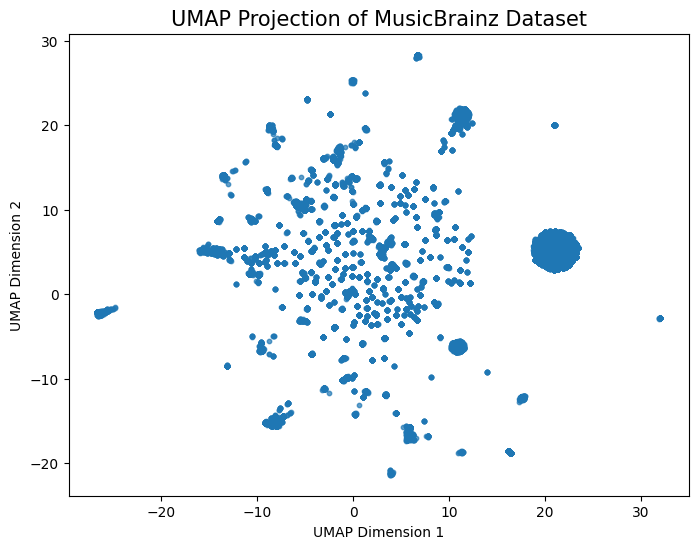

In [8]:
import numpy as np #requires version 2.1
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



# ----------------------------------------------------
# X_umap now holds the 2D embedding of your data
X = merged_df_encoded.values  # Convert DataFrame to a NumPy array

# ----------------------------------------------------
# 3. Optional: Scale data
#    UMAP is sensitive to scale, so standardizing or normalizing is often useful.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------------------------------
# 4. Create and fit the UMAP model
#    Adjust parameters such as n_neighbors, min_dist, etc., as needed.
reducer = umap.UMAP(
    n_neighbors=30,   # typical default, can tune
    n_components=2,   # 2D for visualization
    min_dist=0.1,     # controls how tightly points are clustered
    metric='cosine',
    init='pca',
    random_state=42  # for reproducibility    
)

# Perform the dimensionality reduction
X_umap = reducer.fit_transform(X_scaled)

# ----------------------------------------------------
# 5. Visualize or further process the results
#    If you just want a quick scatter plot:

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=10, alpha=0.7)
plt.title('UMAP Projection of MusicBrainz Dataset', fontsize=15)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()
# you can use for clustering, further visualization, etc.


In [9]:
from sklearn.manifold import trustworthiness
import gc

# Define list of n_neighbors values to test
n_neighbors_list = [50, 100, 200, 400, 800]
results = []

# Downsample X_scaled to a manageable size if it's huge (e.g., 10,000 samples max)
sample_size = min(10000, X_scaled.shape[0])
sample_indices = np.random.choice(X_scaled.shape[0], sample_size, replace=False)
X_scaled_sample = X_scaled[sample_indices]

# Loop over each n_neighbors value using the sample
for n in n_neighbors_list:
    # Create a UMAP instance with the current n_neighbors and a fixed random state
    reducer_temp = umap.UMAP(
        n_neighbors=n,
        n_components=2,
        min_dist=0.1,
        metric='cosine',
        init='pca',
        random_state=42
    )
    # Apply dimensionality reduction on the downsampled data
    X_umap_temp = reducer_temp.fit_transform(X_scaled_sample)
    
    # Calculate trustworthiness on the same sample
    ts = trustworthiness(X_scaled_sample, X_umap_temp, n_neighbors=min(n, 50))
    
    results.append({'n_neighbors': n, 'trustworthiness': ts})
    
    # Clean up to free memory
    del reducer_temp, X_umap_temp
    gc.collect()

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)
print(results_df)



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: Futu

   n_neighbors  trustworthiness
0           50         0.628819
1          100         0.636837
2          200         0.640426
3          400         0.635924
4          800         0.630108


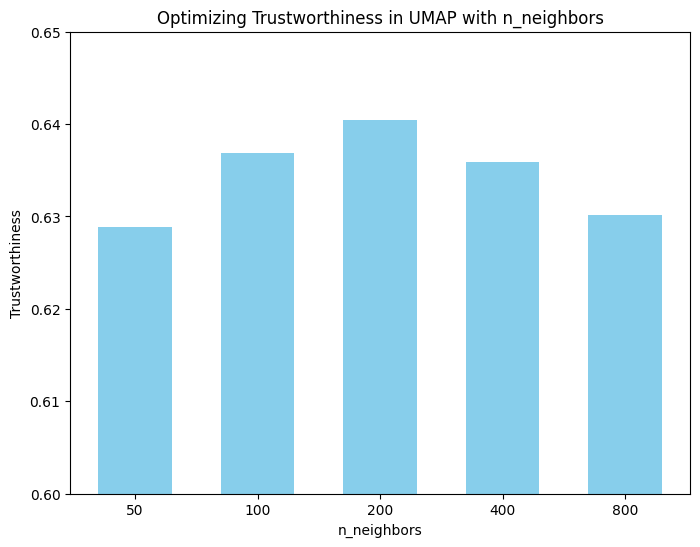

In [16]:

pos = np.arange(len(results_df))
plt.figure(figsize=(8, 6))
plt.bar(pos, results_df['trustworthiness'], color='skyblue', width=0.6)
plt.xticks(pos, results_df['n_neighbors'])
plt.xlabel('n_neighbors')
plt.ylabel('Trustworthiness')
plt.ylim(0.6, 0.65)
plt.title('Optimizing Trustworthiness in UMAP with n_neighbors')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


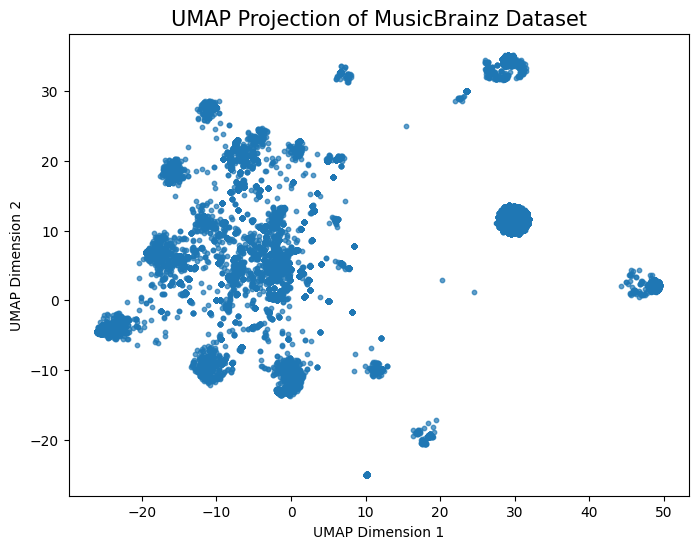

In [17]:
#    Adjust parameters such as n_neighbors, min_dist, etc., as needed.
reducer = umap.UMAP(
    n_neighbors=200,   
    n_components=2,   # 2D for visualization
    min_dist=0.1,     # controls how tightly points are clustered
    metric='cosine',
    init='pca',
    random_state=42  # for reproducibility    
)

# Perform the dimensionality reduction
X_umap = reducer.fit_transform(X_scaled)

# ----------------------------------------------------
# 5. Visualize or further process the results
#    If you just want a quick scatter plot:

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=10, alpha=0.7)
plt.title('UMAP Projection of MusicBrainz Dataset', fontsize=15)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()



Processed features 0 to 500
Processed features 500 to 1000
Processed features 1000 to 1500
Processed features 1500 to 2000
Processed features 2000 to 2500
Processed features 2500 to 3000
Processed features 3000 to 3500
Processed features 3500 to 4000
Processed features 4000 to 4500
Processed features 4500 to 5000
Processed features 5000 to 5500
Processed features 5500 to 6000
Processed features 6000 to 6500
Processed features 6500 to 7000
Processed features 7000 to 7500
Processed features 7500 to 8000
Processed features 8000 to 8500
Processed features 8500 to 9000
Processed features 9000 to 9500
Processed features 9500 to 10000
Processed features 10000 to 10500
Processed features 10500 to 11000
Processed features 11000 to 11500
Processed features 11500 to 12000
Processed features 12000 to 12500
Processed features 12500 to 13000
Processed features 13000 to 13500
Processed features 13500 to 14000
Processed features 14000 to 14500
Processed features 14500 to 15000
Processed features 15000

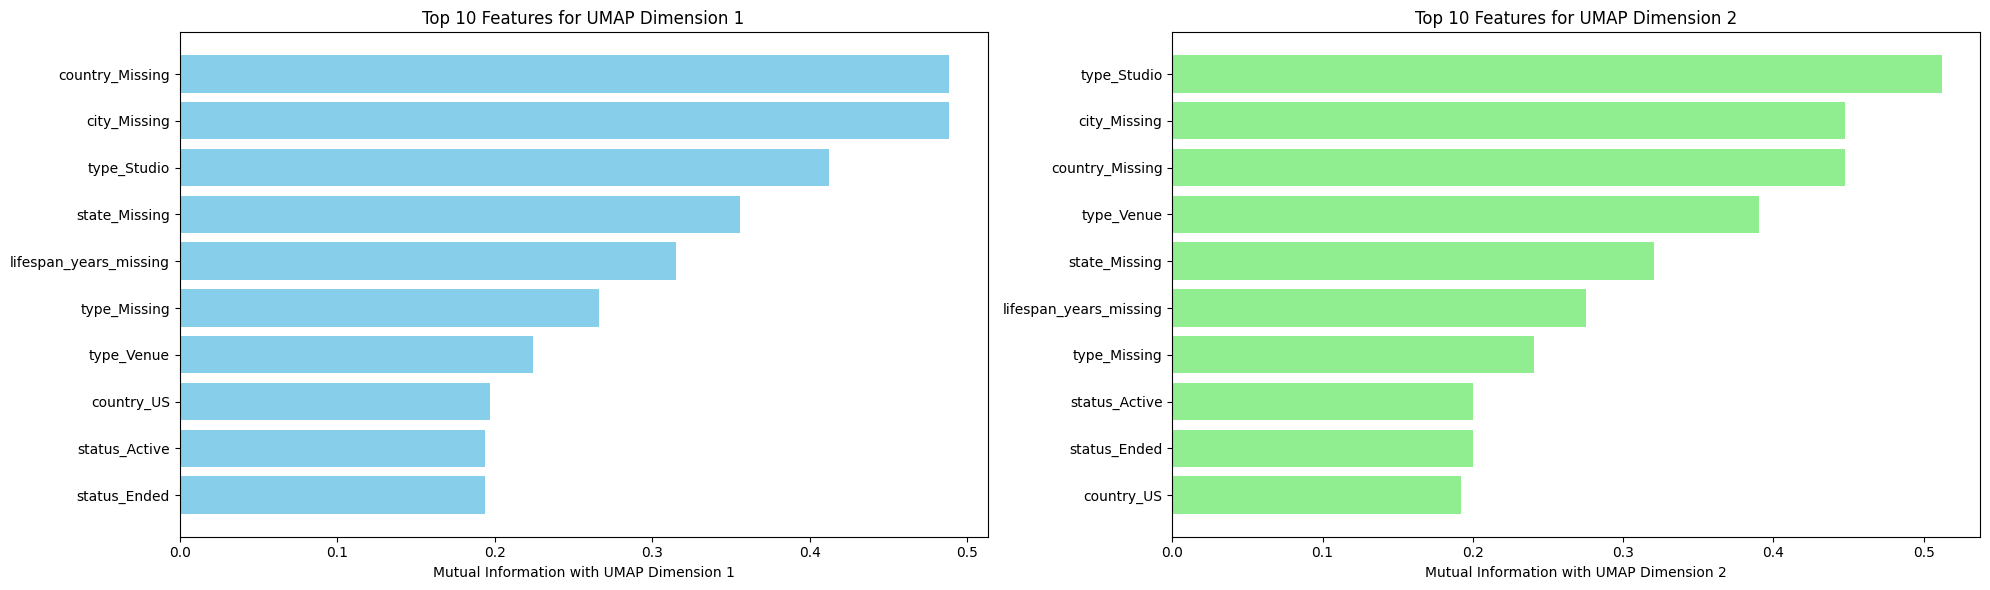

In [18]:
from sklearn.feature_selection import mutual_info_regression


# Define a function to compute mutual information in batches
def compute_mi_in_batches(X, y, batch_size=500):
    n_features = X.shape[1]
    mi_scores = np.zeros(n_features)
    for start in range(0, n_features, batch_size):
        end = min(start + batch_size, n_features)
        X_batch = X[:, start:end]
        mi_batch = mutual_info_regression(X_batch, y)
        mi_scores[start:end] = mi_batch
        print(f"Processed features {start} to {end}")
    return mi_scores

# Convert the encoded dataframe to a NumPy array for processing
X_features = merged_df_encoded.values

# ----------------------------
# Analysis for UMAP Dimension 1
# ----------------------------
mi_dim1_scores = compute_mi_in_batches(X_features, X_umap[:, 0], batch_size=500)
mi_dim1 = list(zip(merged_df_encoded.columns, mi_dim1_scores))

# Sort and extract the top 10 features for Dimension 1
sorted_mi_dim1 = sorted(mi_dim1, key=lambda x: x[1], reverse=True)
top_features_dim1 = sorted_mi_dim1[:10]
features_dim1 = [feature for feature, _ in top_features_dim1]
mi_scores_dim1 = [score for _, score in top_features_dim1]

# ----------------------------
# Analysis for UMAP Dimension 2
# ----------------------------
mi_dim2_scores = compute_mi_in_batches(X_features, X_umap[:, 1], batch_size=500)
mi_dim2 = list(zip(merged_df_encoded.columns, mi_dim2_scores))

# Sort and extract the top 10 features for Dimension 2
sorted_mi_dim2 = sorted(mi_dim2, key=lambda x: x[1], reverse=True)
top_features_dim2 = sorted_mi_dim2[:10]
features_dim2 = [feature for feature, _ in top_features_dim2]
mi_scores_dim2 = [score for _, score in top_features_dim2]

# ----------------------------
# Plot the bar charts side by side
# ----------------------------
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Bar chart for Dimension 1
axes[0].barh(features_dim1, mi_scores_dim1, color='skyblue')
axes[0].set_xlabel('Mutual Information with UMAP Dimension 1')
axes[0].set_title('Top 10 Features for UMAP Dimension 1')
axes[0].invert_yaxis()  # Highest MI at the top

# Bar chart for Dimension 2
axes[1].barh(features_dim2, mi_scores_dim2, color='lightgreen')
axes[1].set_xlabel('Mutual Information with UMAP Dimension 2')
axes[1].set_title('Top 10 Features for UMAP Dimension 2')
axes[1].invert_yaxis()  # Highest MI at the top

plt.tight_layout()
plt.show()


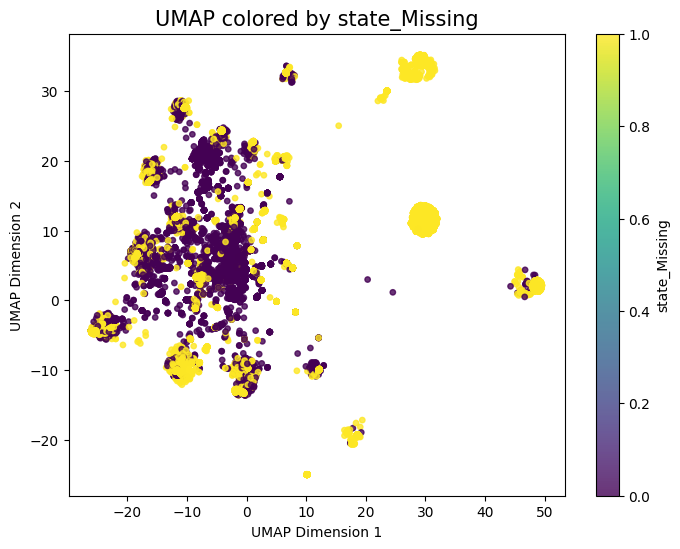

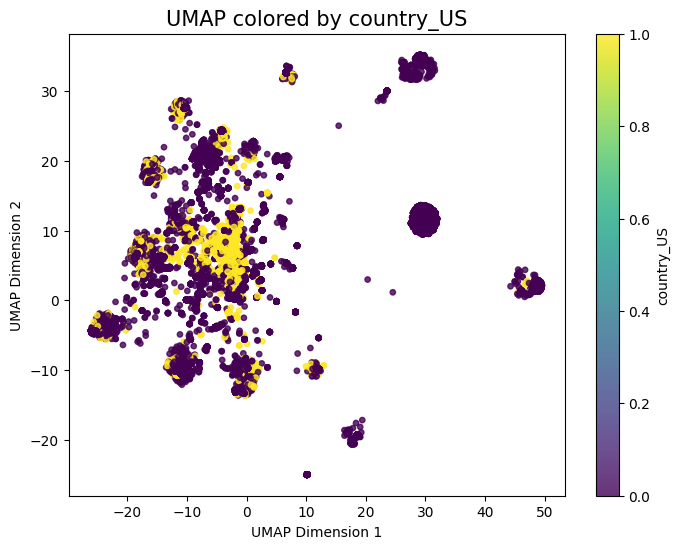

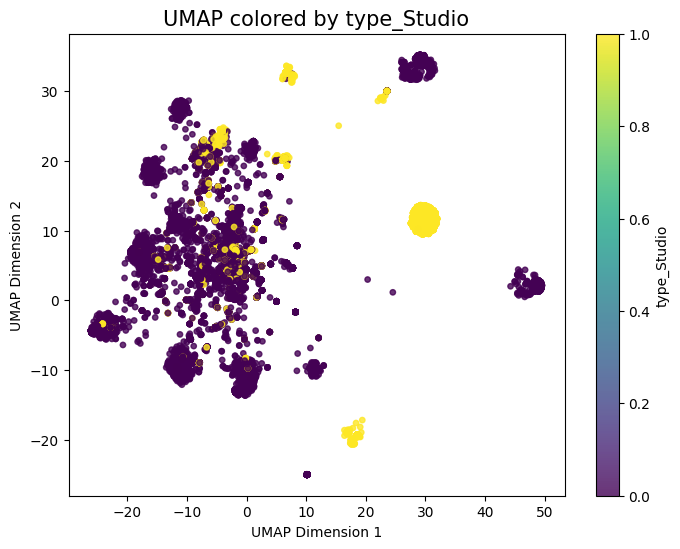

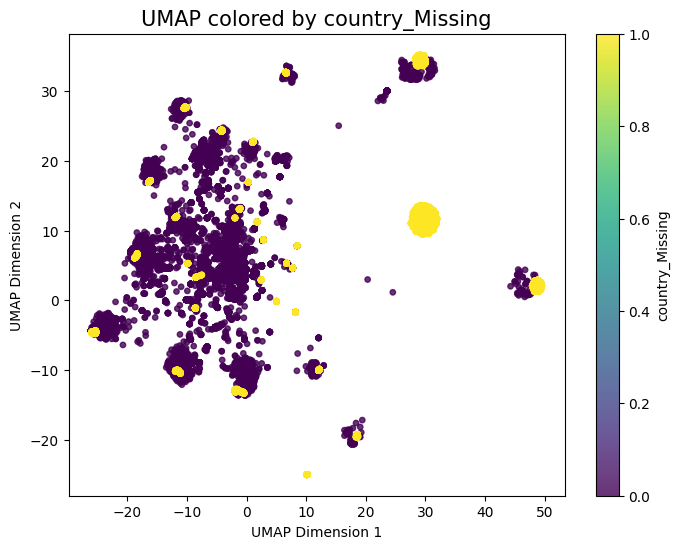

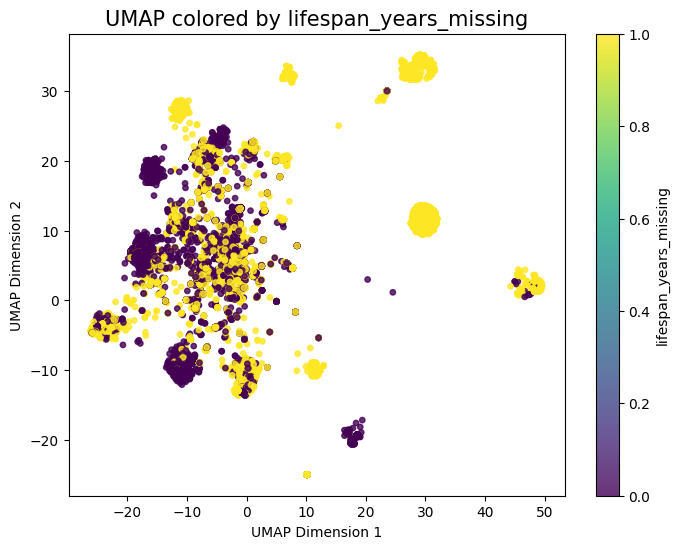

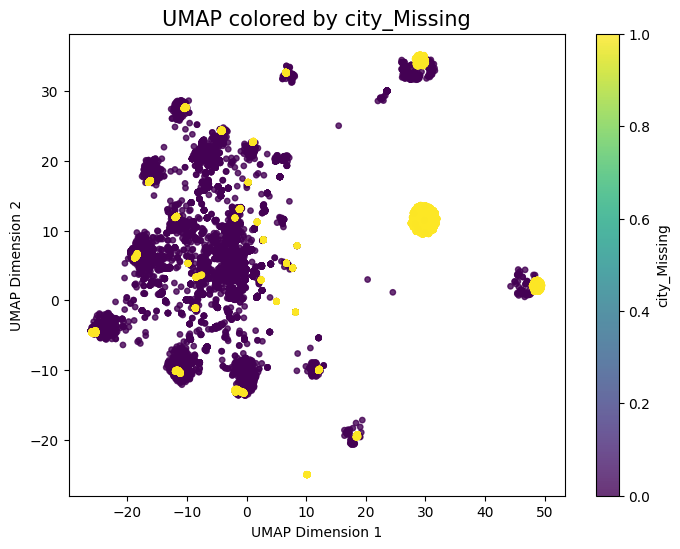

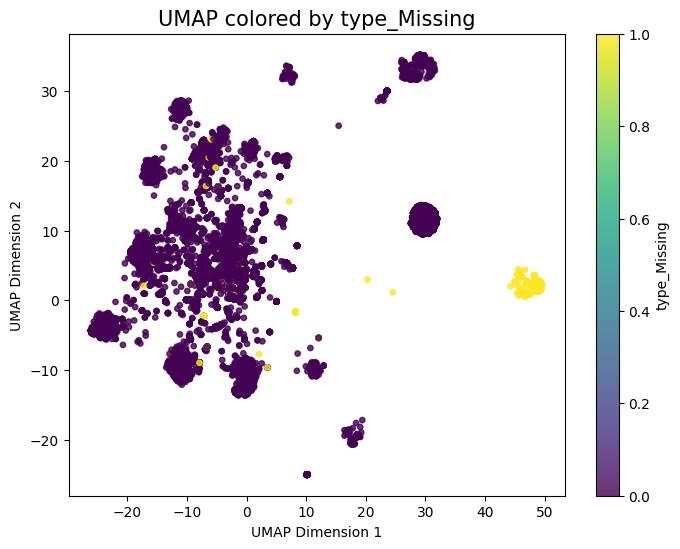

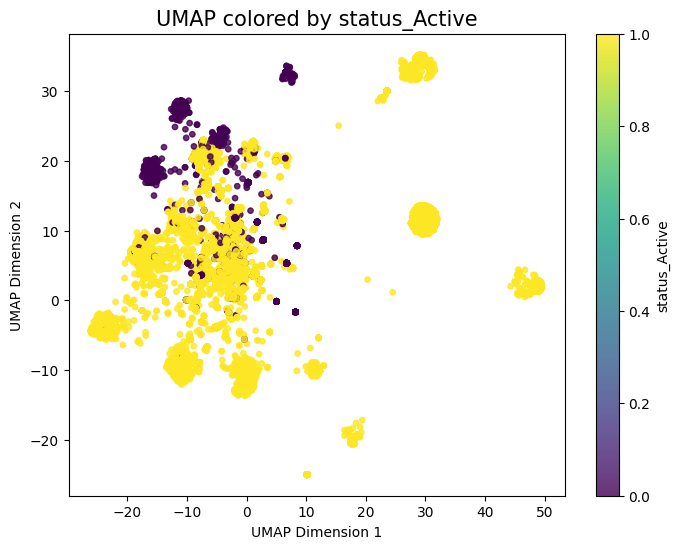

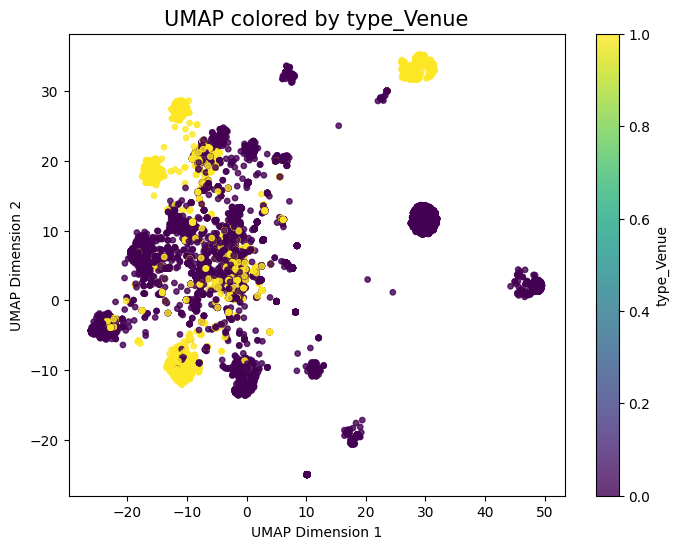

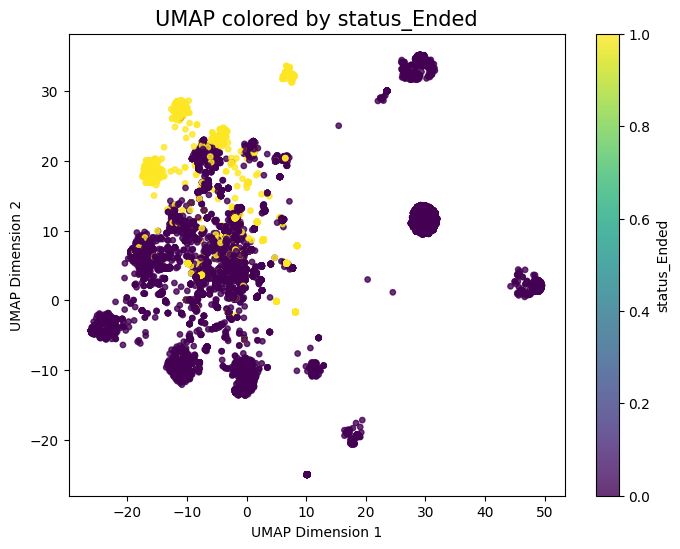

In [19]:

# Combine into one list (or keep them separate if you prefer)
features_to_examine = list(set(features_dim1 + features_dim2))


#Plot each feature in a loop

for feat in features_to_examine:
    if feat not in merged_df_encoded.columns:
        print(f"Warning: {feat} is not a column in merged_df_encoded.")
        continue
    
    plt.figure(figsize=(8, 6))
    plt.scatter(
        X_umap[:, 0],
        X_umap[:, 1],
        c=merged_df_encoded[feat],  # color by feature
        cmap='viridis',            # or another colormap (e.g., 'plasma', 'coolwarm')
        s=15,
        alpha=0.8
    )
    plt.colorbar(label=feat)
    plt.title(f'UMAP colored by {feat}', fontsize=15)
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.show()
